In [1]:
import torch
from refactor.probes import model_setup

In [2]:
model_names = ["gpt_gptsw3_en_da_356m_gbs1024","gpt_gptsw3_en_da_is_356m_gbs1024","gpt_gptsw3_en_is_da_356m_gbs1024","gpt_sw3_356m"]
lambda_val = 5
layer = "transformer.h.15.ln_1.bias"
for model_name in model_names:
    
    model_path = "downloaded_models/"

    model, tokenizer, device = model_setup(f"{model_path}{model_name}")
    
    steering = torch.load(f"steering_vectors/{model_name}/combined_steering_vector_layer_15_tensor.pt",map_location = device)
    
    model.state_dict()[layer] += steering*lambda_val
    
    model.save_pretrained(f'{model_path}/{model_name}_with_steering_lambda_{lambda_val}')
    tokenizer.save_pretrained(f'{model_path}/{model_name}_with_steering_lambda_{lambda_val}')  # Optional but recommended

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

found device: cpu


/var/folders/p0/267bnxr16cq2xpr1crtpxbgw0000gn/T/ipykernel_4552/1524319005.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  steering = torch.load(f"steering_vectors/{mod

In [64]:
import pandas as pd
df = pd.read_csv("results/data/steering_data_bible/bible_data_combined.csv")
df = df[(df.layer == 15) & (df.lambda_amount == 5)]
temp =pd.read_csv("results\data\steering_data_bible\combined_english_without_steering.csv")

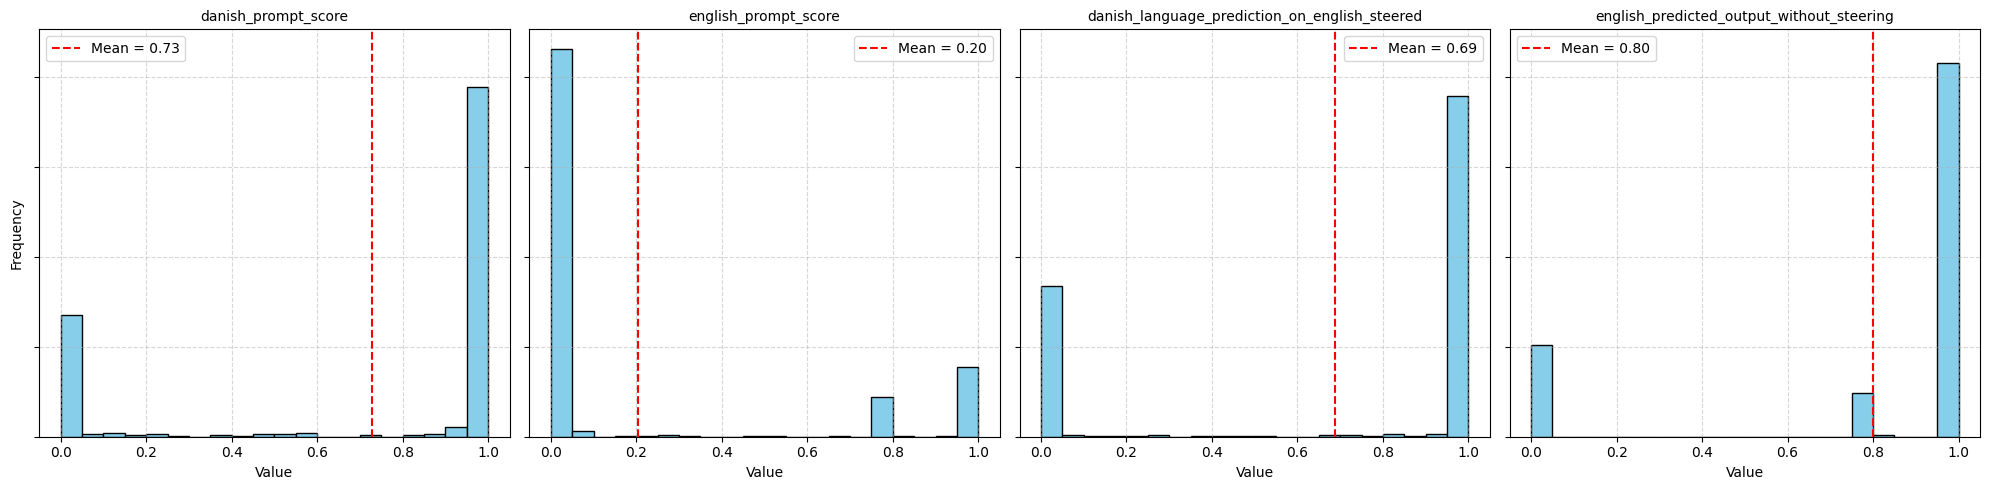

In [71]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns = [
    "danish_prompt_score",
    "english_prompt_score",
    "danish_language_prediction_on_english_steered",
    "english_predicted_output_without_steering"
]

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, (ax, col) in enumerate(zip(axes, columns)):
    data = df[col].dropna()
    mean_val = data.mean()

    ax.hist(data, bins=20, color='skyblue', edgecolor='black')
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_val:.2f}')
    ax.set_title(col, fontsize=10, wrap=True)
    ax.set_xlabel('Value')
    
    if i == 0:
        ax.set_ylabel('Frequency')
    else:
        ax.set_yticklabels([])

    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

# Improve spacing
plt.tight_layout()
plt.show()


In [5]:
df[df.danish_prompt_score < 0.6].sample(10)["danish_predicted_output"]

31215                                       .<|endoftext|>
14655     muref, andr, shamam, kutah, pabu, mureh, andr...
25527                     +) 13158: 319. +) 13217: 320. +)
26679     sjelen avlede sjele, a, s, m, 1939\n-avlede s...
36039     de barabahaen, den haferuahen, shemna, shofar...
3447                                        .<|endoftext|>
48543     -> 31But the third, fourth and fifth days, as...
495                                         .<|endoftext|>
43863     ->\nIn the end all creatures on the earth wer...
25575     Denne sønn ble gift en gang, og med ham blev ...
Name: danish_predicted_output, dtype: object

In [ ]:
df[df.danish_prompt_score < 0.6].sample(10)["danish_predicted_output"]

In [17]:
df[df.english_prompt_score < 0.6].sample(10)["english_predicted_output"]

18567      13. dansk: Dette gælder også for produkter, ...
34119    " på Dansk.  Den tredje gang sagde Gud til Ada...
14031                                                  ...
39159        For en kort tid, er det kun de to børn, so...
41799        Engelsk: "November 1984" er en serie af 12...
36999     og hver fugl på himlen, og bragt dem til mand...
11703        20. 30% af de danske børn får nemlig deres...
42687        TIL    1. Den Hellige Ånd er den eneste sa...
40479     de havde to små børn. de havde ingen penge. d...
47247    . ->  engelsk  Og da sagde Herren til Moses: S...
Name: english_predicted_output, dtype: object

In [63]:
df[df.danish_language_prediction_on_english_steered > 0.7].sample(10).english_predicted_output.iloc[0]

'    18. På den anden side er den ikke lige så god som sin forgænger. ->  On den anden side er den ikke lige så god som forgængeren.    19. Du kan ikke bruge din egen hånd til at gøre det, men med en hånd, kan du være i stand til at gøre det, som du ønsker. ->  Du kan ikke bruge din egen'